## About this file 

#### Column Profiling:
#### datetime: datetime
#### season: season (1: spring, 2: summer, 3: fall, 4: winter)
#### holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
#### workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
#### weather: 1: Clear, Few clouds, partly cloudy, partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#### temp: temperature in Celsius
#### atemp: feeling temperature in Celsius
#### humidity: humidity
#### windspeed: wind speed
#### casual: count of casual users
#### registered: count of registered users
#### count: count of total rental bikes including both casual and registered

In [1]:
# data from Kaggel link - https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data/data
# code link - https://www.kaggle.com/code/roggerr/yulu-eda-and-hypthesis-testing-in-details

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,f_oneway, levene, kruskal, shapiro, chi2_contingency
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("D:/All project/yulu_bike_sharing_dataset.csv")
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# no of Rows and Columns

df.shape

(10886, 12)

In [5]:
# Checking of Null values 

df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### There are total 10886 rows and 12 columns
#### The data does not contains any null values. So, no need to handle missing values

In [6]:
# checking duplicate 
df.duplicated().sum()

np.int64(0)

In [7]:
# skewness of each column

df.skew(numeric_only= True)

season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

#### Skewness Analysis of Variable 


Symmetrical Majority:
  The majority of the variable, including 'season' and 'temp',exhibit skewness values close to zero, suggestive relatively 
  symmetrical distribution

Postive skewness Insight 
  variable such as 'holiday','weather','windspeed','casual','registered','count' demonstrate positive skewness

Negative skewness Insight
  In contrast 'workingday','atemp','humidity' demonstrate negative skewness




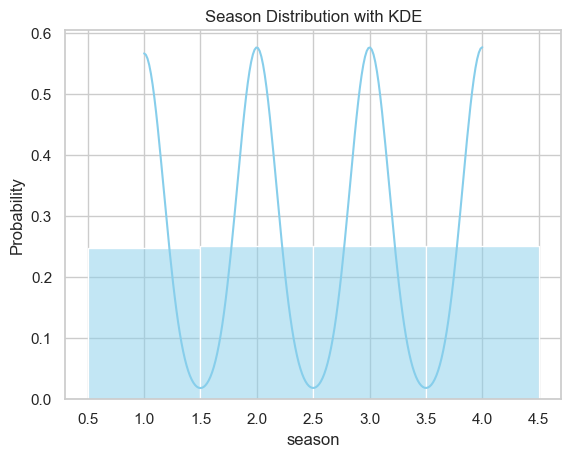

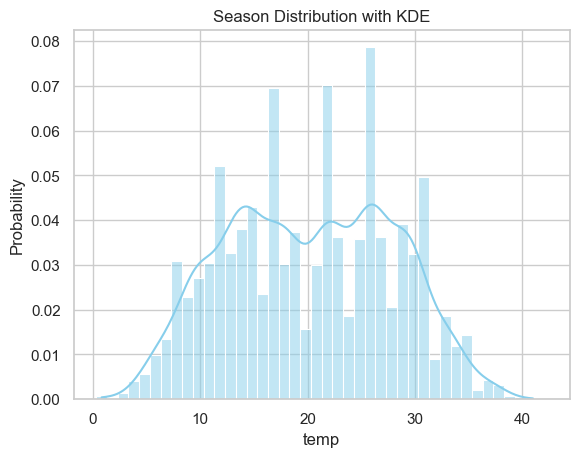

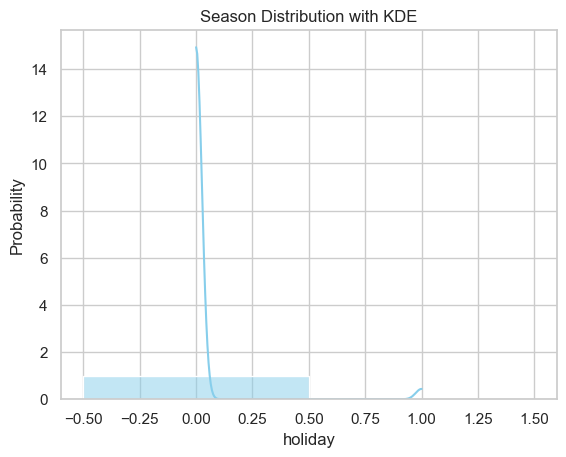

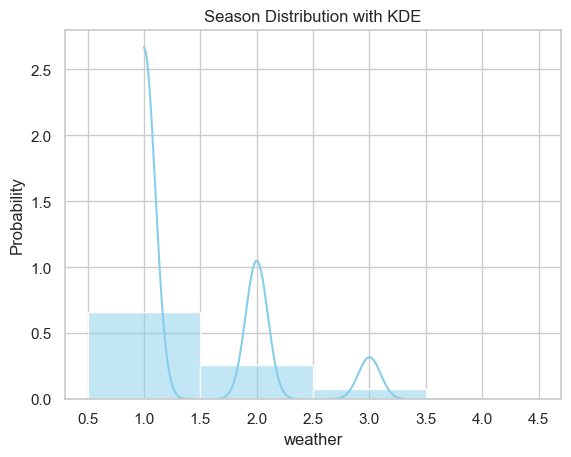

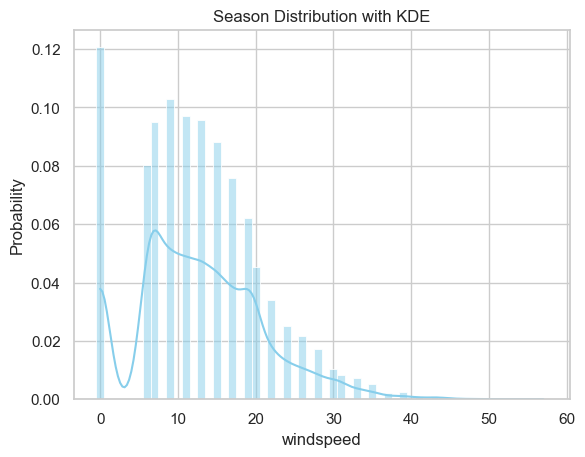

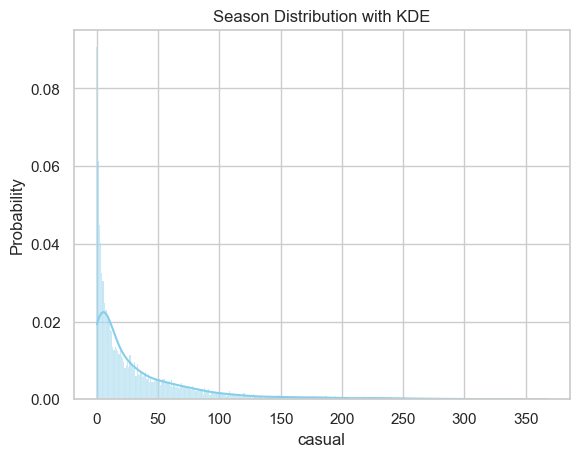

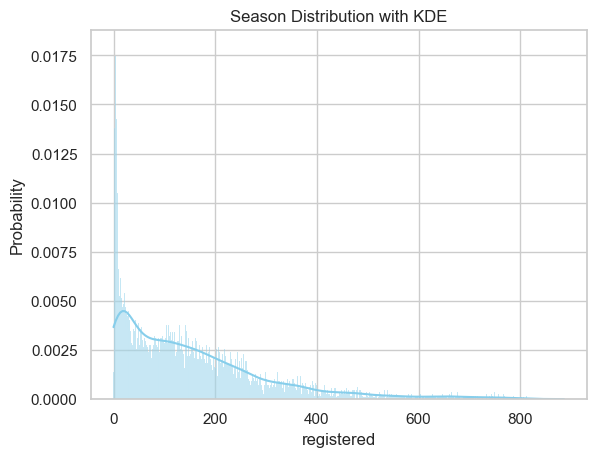

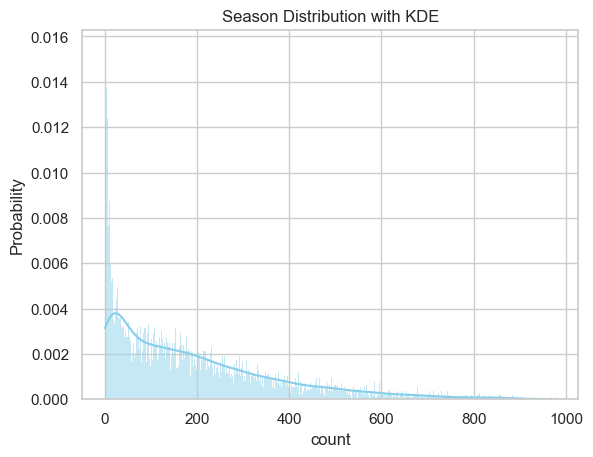

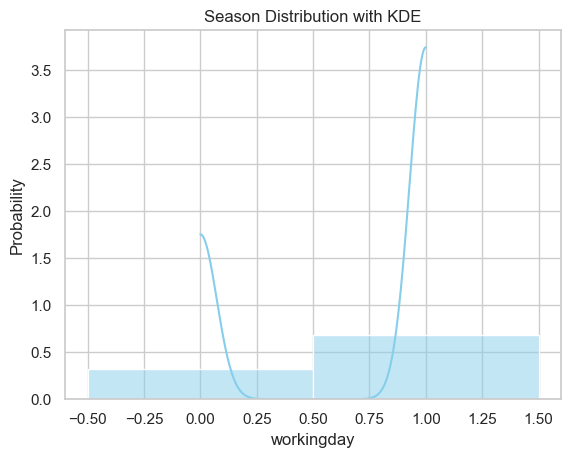

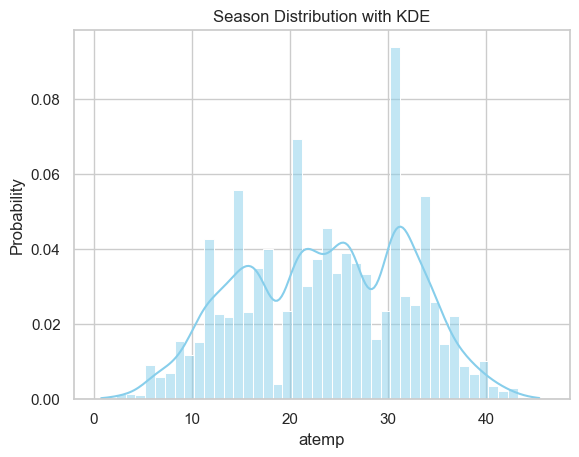

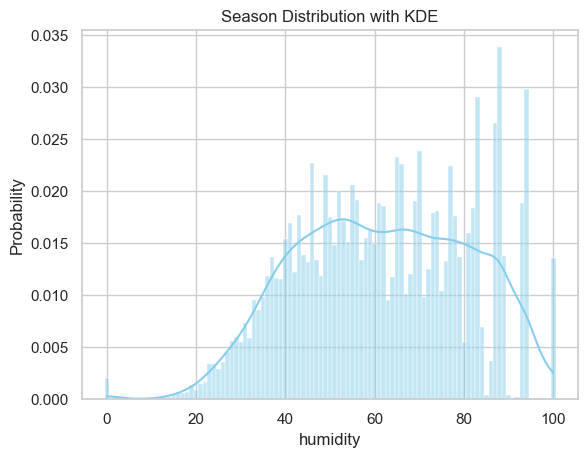

In [8]:
sns.set_theme(style="whitegrid")
columns = ['season','temp','holiday','weather','windspeed','casual','registered','count','workingday','atemp','humidity']

for col in df[columns]:
    sns.histplot(data=df, x= col,
             discrete=True,
             stat="probability",       # or 'count' or 'density'
             kde=True,
             color="skyblue",
             binwidth=1)
    plt.title("Season Distribution with KDE")
    plt.xlabel(col)
    plt.ylabel("Probability")
    plt.show()